<a href="https://colab.research.google.com/github/ParthPatki/COE379L_P1/blob/main/COE379L_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

Breast Cancer Prediction


---





**LLM USE DISCLOSURE**

LLMs were used to suggest additional ways to clean data, improve classifiers, and help with visualization of data

# **Part 1**

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset
data = pd.read_csv('project1.csv')

# Display initial rows to understand structure
data.head()

# Display dataset details
data.info()

# Print dataset dimensions
print(f"Dataset dimensions (rows, columns): {data.shape}")
print(f"Total elements in dataset: {data.size}")

# Identify and remove duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()

# Identify and handle missing values
missing_counts = data.isnull().sum()
print("Missing values per column:")
print(missing_counts)

data = data.fillna(data.mode().iloc[0])  # Fill categorical missing values with mode

# Convert categorical variables into numerical representations
data_encoded = pd.get_dummies(data, drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB
Dataset dimensions (rows, columns): (386, 10)
Total elements in dataset: 3860
Number of duplicate rows: 11
Missing values per column:
class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


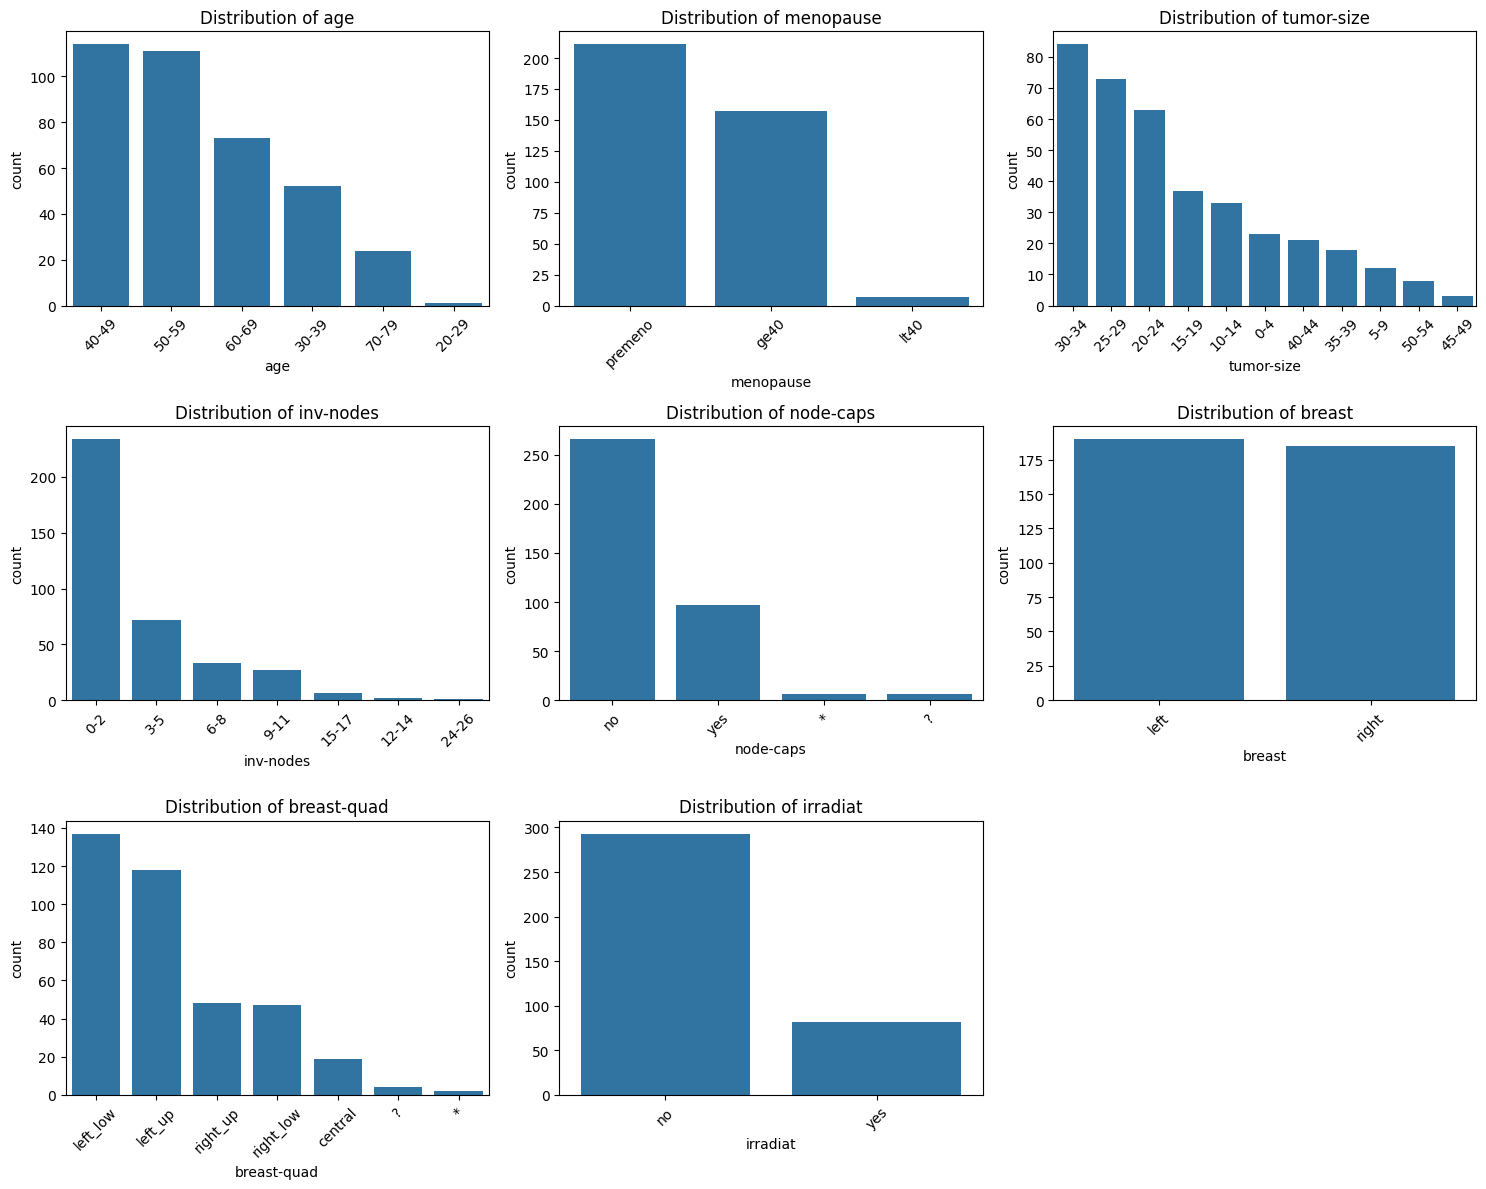

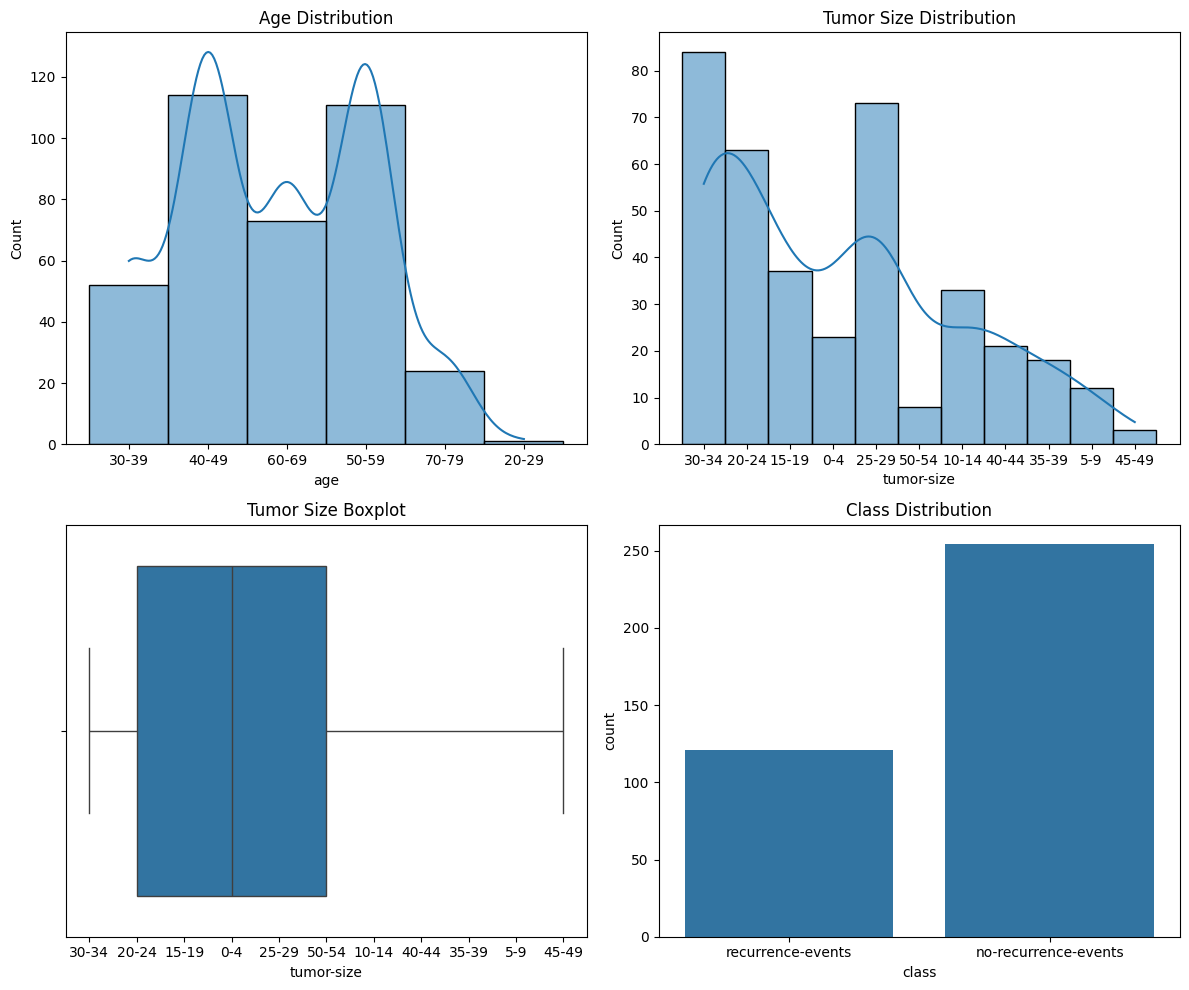

In [12]:
# Visualization
plt.figure(figsize=(15, 12))
categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Univariate Analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")
sns.histplot(data['tumor-size'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Tumor Size Distribution")
sns.boxplot(x=data['tumor-size'], ax=axes[1, 0])
axes[1, 0].set_title("Tumor Size Boxplot")
sns.countplot(x=data['class'], ax=axes[1, 1])
axes[1, 1].set_title("Class Distribution")
plt.tight_layout()
plt.show()

# **Part 2**

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Split data into training and test sets (80/20 split)
x_features = data_encoded.drop(columns=['class_recurrence-events'])  # Target column
y_target = data_encoded['class_recurrence-events']
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

# Normalize feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
y_pred_knn = knn_model.predict(x_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=1))
print(f"KNN Recall: {recall_score(y_test, y_pred_knn)}")
print(f"KNN F1-Score: {f1_score(y_test, y_pred_knn)}")

# KNN with GridSearchCV to find optimal parameters
knn_params = {'n_neighbors': range(1, 20)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_search_knn.fit(x_train_scaled, y_train)
print(f"Best KNN parameters: {grid_search_knn.best_params_}")
y_pred_knn_best = grid_search_knn.predict(x_test_scaled)
print("Optimized KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_best, zero_division=1))
print(f"Optimized KNN Recall: {recall_score(y_test, y_pred_knn_best)}")
print(f"Optimized KNN F1-Score: {f1_score(y_test, y_pred_knn_best)}")

# Logistic Regression Classifier
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train_scaled, y_train)
y_pred_log = log_reg_model.predict(x_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, zero_division=1))
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log)}")
print(f"Logistic Regression F1-Score: {f1_score(y_test, y_pred_log)}")

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.88      0.77        51
        True       0.33      0.12      0.18        24

    accuracy                           0.64        75
   macro avg       0.51      0.50      0.48        75
weighted avg       0.57      0.64      0.58        75

KNN Recall: 0.125
KNN F1-Score: 0.18181818181818182
Best KNN parameters: {'n_neighbors': 19}
Optimized KNN Classification Report:
              precision    recall  f1-score   support

       False       0.68      1.00      0.81        51
        True       1.00      0.00      0.00        24

    accuracy                           0.68        75
   macro avg       0.84      0.50      0.40        75
weighted avg       0.78      0.68      0.55        75

Optimized KNN Recall: 0.0
Optimized KNN F1-Score: 0.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.86    